In [ ]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv

--2023-02-07 06:00:19--  https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7943 (7.8K) [text/plain]
Saving to: ‘tips.csv’

tips.csv            100%[===================>]   7.76K  --.-KB/s    in 0s      

2023-02-07 06:00:19 (65.6 MB/s) - ‘tips.csv’ saved [7943/7943]



In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("./tips.csv")

In [ ]:
df.shape

(244, 7)

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [ ]:
color = df['day'].replace(['Sun', 'Sat', 'Thur', 'Fri'], [1, 2, 3, 4])
color

0      1
1      1
2      1
3      1
4      1
      ..
239    2
240    2
241    2
242    2
243    3
Name: day, Length: 244, dtype: int64

# Visualization!

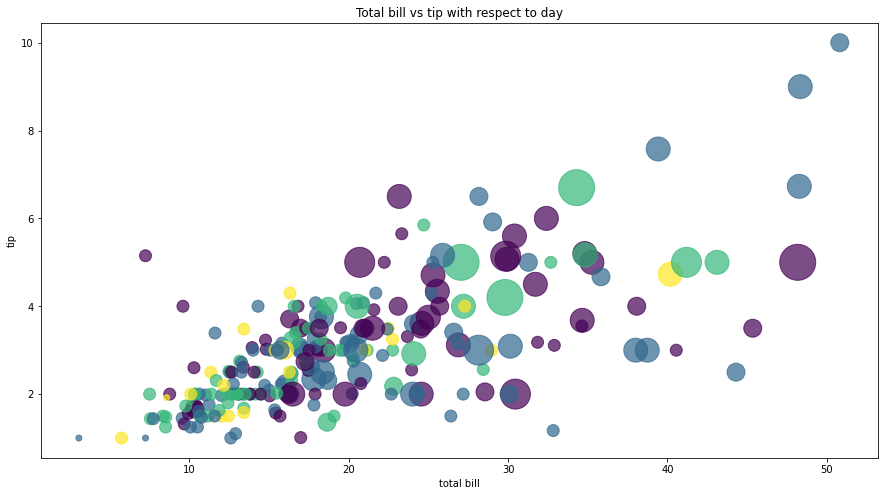

In [ ]:
plt.figure(figsize=(15, 8)) 
plt.scatter(df["total_bill"], df["tip"], s=(df['size']*6)**2, c= color, alpha=0.7)
plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("Total bill vs tip with respect to day")
plt.show()

In [ ]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
sex_color = df['sex'].replace(['Female', 'Male'], ['b', 'r'])
sex_color.head()

0    b
1    r
2    r
3    r
4    b
Name: sex, dtype: object

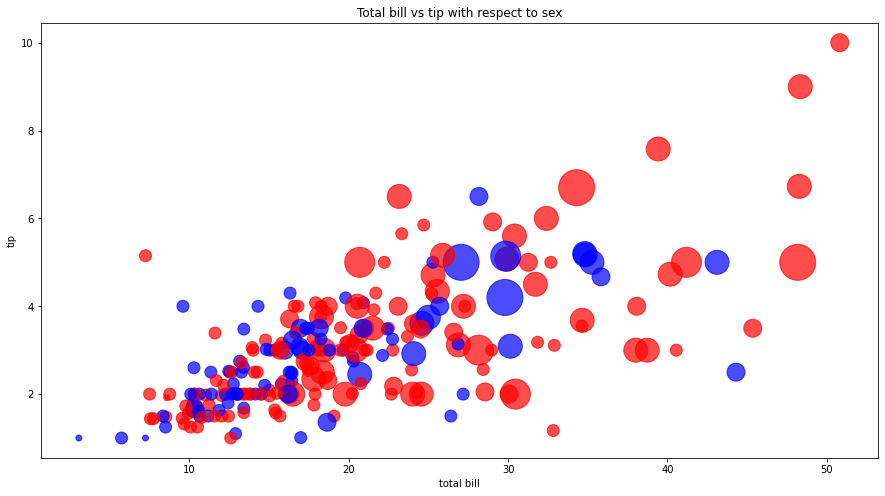

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(df.total_bill, df.tip, s=((df['size'] * 6)**2), c= sex_color, alpha=0.7)
plt.xlabel("total bill")
plt.ylabel('tip')
plt.title("Total bill vs tip with respect to sex")
plt.show()

In [ ]:
time_color = df.time.replace(df['time'].unique(), [0, 1])

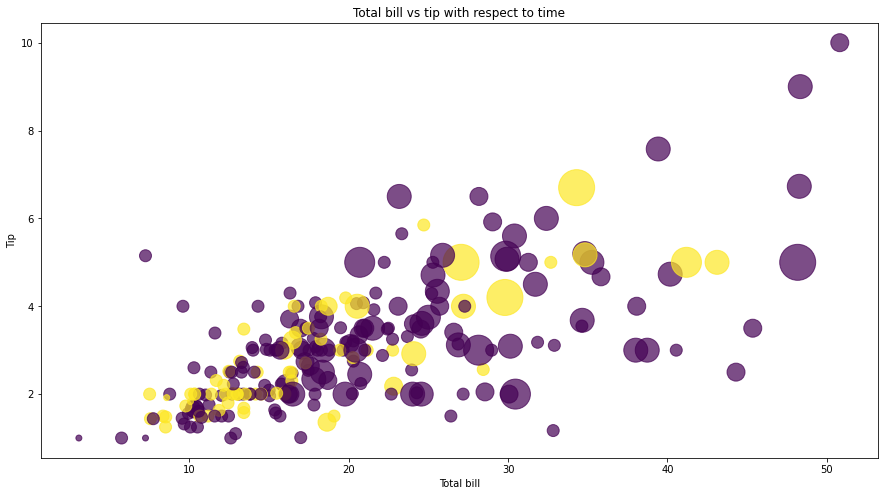

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(df.total_bill, df.tip, s=((df['size']*6)**2), c=time_color, alpha=0.7)
plt.title("Total bill vs tip with respect to time")
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.show()

# Pie visualization

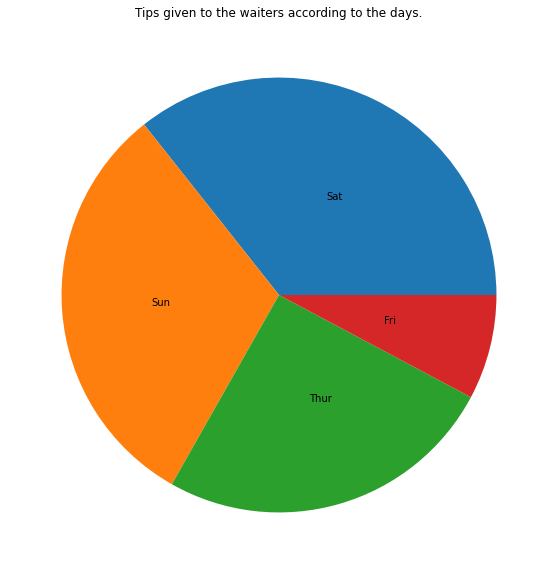

In [ ]:
day_count = df['day'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(day_count, labels= day_count.index, labeldistance=0.5)
plt.title("Tips given to the waiters according to the days.")
plt.show()

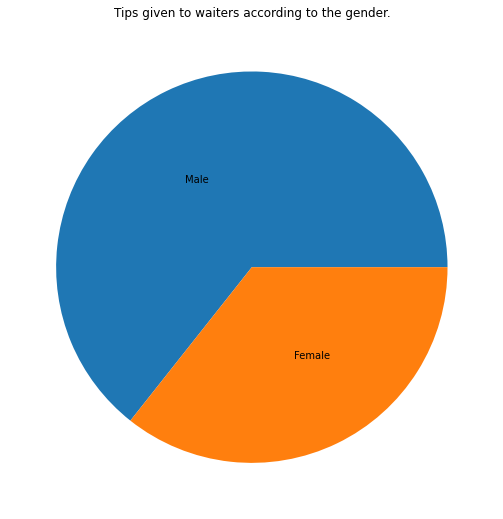

In [ ]:
plt.figure(figsize=(9, 9))
gender_count = df['sex'].value_counts()
plt.pie(gender_count, labels=gender_count.index, labeldistance=0.5)
plt.title("Tips given to waiters according to the gender.")
plt.show()


Most tip are given by males.

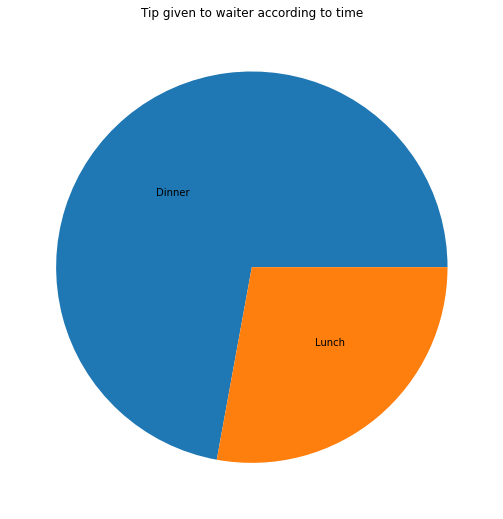

In [ ]:
time_count = df['time'].value_counts()
plt.figure(figsize=(9, 9))
plt.pie(time_count, labels=time_count.index, labeldistance=0.5)
plt.title("Tip given to waiter according to time")
plt.show()

Tips are given more on dinner than on lunch.

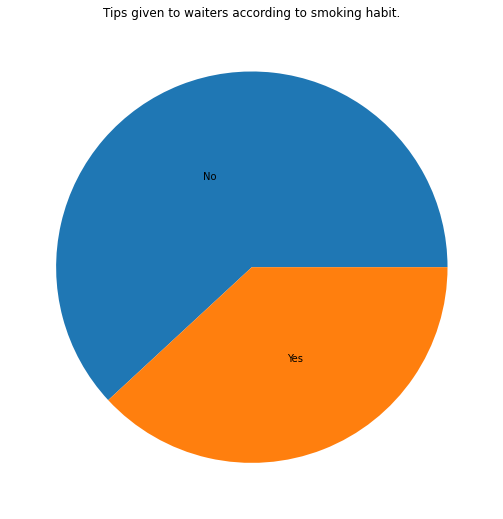

In [ ]:
smoker_count = df['smoker'].value_counts()

plt.figure(figsize=(9, 9))
plt.pie(smoker_count, labels=smoker_count.index, labeldistance=0.5)
plt.title("Tips given to waiters according to smoking habit.")
plt.show()

The person who is not a smoker is more likely to give tip than a smoker person

# Waiter tip prediction Model

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


AS our model should predict the tip, so tip is our output data (y) and rest is input data (X)

In [130]:
y = df["tip"]
X = df.drop('tip', axis=1)

X = pd.get_dummies(data=X, columns=['sex', 'smoker', 'day', 'time'])

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [163]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss='mae',
    optimizer='Adam',
    metrics='mae'
)

history_1 = model_1.fit(X_train, y_train, epochs=10, verbose=0)

In [164]:
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.6654 - mae: 0.6654


[0.6653624773025513, 0.6653624773025513]

In [165]:
n = 12
model_1.predict(X_train[n-1:n]), y_train[n-1:n]

1/1 [==============================] - 0s 67ms/step


(array([[2.4583101]], dtype=float32), 79    2.71
 Name: tip, dtype: float64)

In [146]:
n = 9
model_1.predict(X_train[n-1:n]), y_train[n-1:n]

1/1 [==============================] - 0s 40ms/step


(array([[3.3821185]], dtype=float32), 165    3.48
 Name: tip, dtype: float64)

In [167]:
n = 20
model_1.predict(X_train[n-1:n]), y_train[n-1:n]

1/1 [==============================] - 0s 25ms/step


(array([[1.7152311]], dtype=float32), 148    1.73
 Name: tip, dtype: float64)